In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import zipfile
import kaggle

In [56]:
!kaggle datasets download -d samuelcortinhas/credit-card-approval-clean-data

credit-card-approval-clean-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [57]:
zipfile_name = 'credit-card-approval-clean-data.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [58]:
df = pd.read_csv("clean_dataset.csv")

In [59]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [60]:
approval_counts = df['Approved'].value_counts()
print(approval_counts)

0    383
1    307
Name: Approved, dtype: int64


Data is clean and ready to use. I will change values if need to later on.

## Histogram
- Histogram displaying frequency of approval by age
- Histogram displaying frequency of rejection by age
- A stacked histogram to visually compare the relative contribution of approved and rejected applications to observer any patterns in the distributions

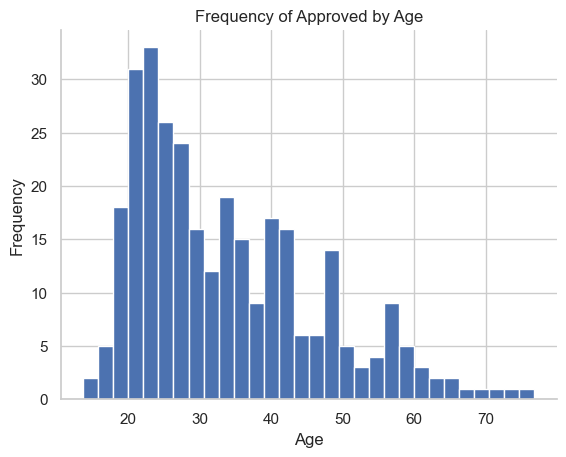

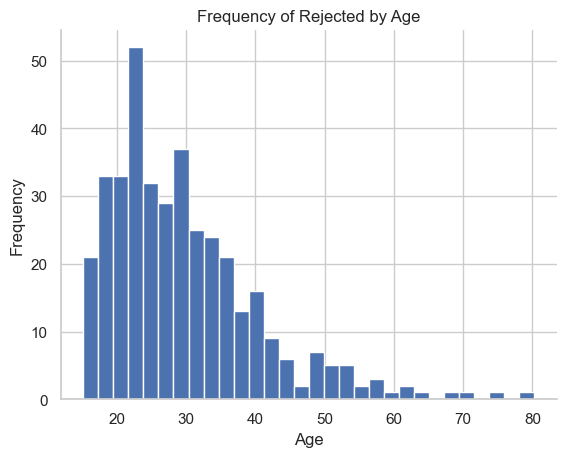

In [61]:
# filtering dataframe
approved_data = df[df['Approved'] == 1]['Age']
rejected_data = df[df['Approved'] == 0]['Age']
# plotting histograms
plt.hist(approved_data, bins=30, label='Approved')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency of Approved by Age')
sns.despine(right=True, top=True)
plt.show()

plt.hist(rejected_data, bins=30, label='Rejected')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency of Rejected by Age')
sns.despine(right=True, top=True)
plt.show()

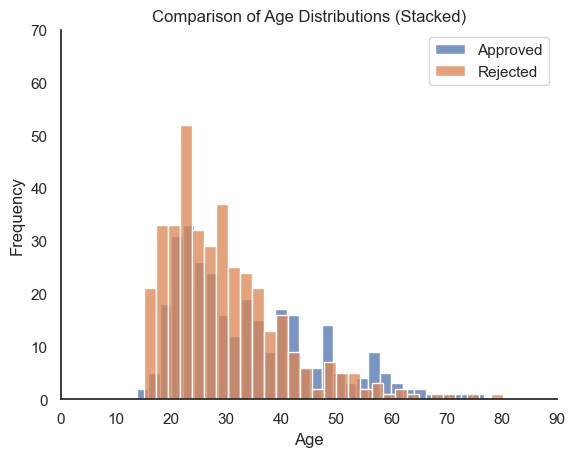

In [62]:
# seaborn stacked histogram to display comparison
sns.set_style("white")
sns.histplot(approved_data, bins=30, label='Approved')
sns.histplot(rejected_data, bins=30, label='Rejected')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Comparison of Age Distributions (Stacked)')
plt.legend()

plt.xticks(range(0, 100, 10)) 
plt.yticks(range(0, 80, 10))

sns.despine()

plt.show()

# Bar plot
- Bar plot for approved/rejected for each industry/occupation

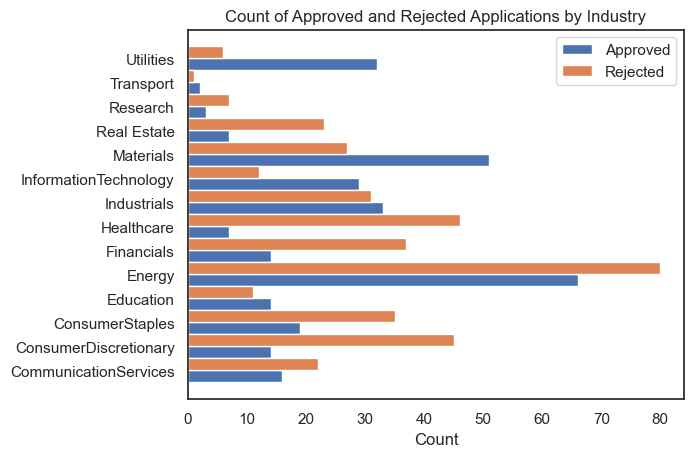

In [63]:
# group the data by industry and calculate the count 
grouped_data = df.groupby('Industry')['Approved'].value_counts().unstack().fillna(0)
categories = grouped_data.index
# get the count of approved and rejected applications
approved_counts = grouped_data[1]
rejected_counts = grouped_data[0]

bar_width = 0.5
ind = np.arange(len(categories))

plt.barh(ind, approved_counts, height=bar_width, label='Approved')
plt.barh(ind + bar_width, rejected_counts, height=bar_width, label='Rejected')
plt.yticks(ind + bar_width / 2, categories)
plt.xlabel('Count')
plt.title('Count of Approved and Rejected Applications by Industry')
plt.legend()
plt.show()

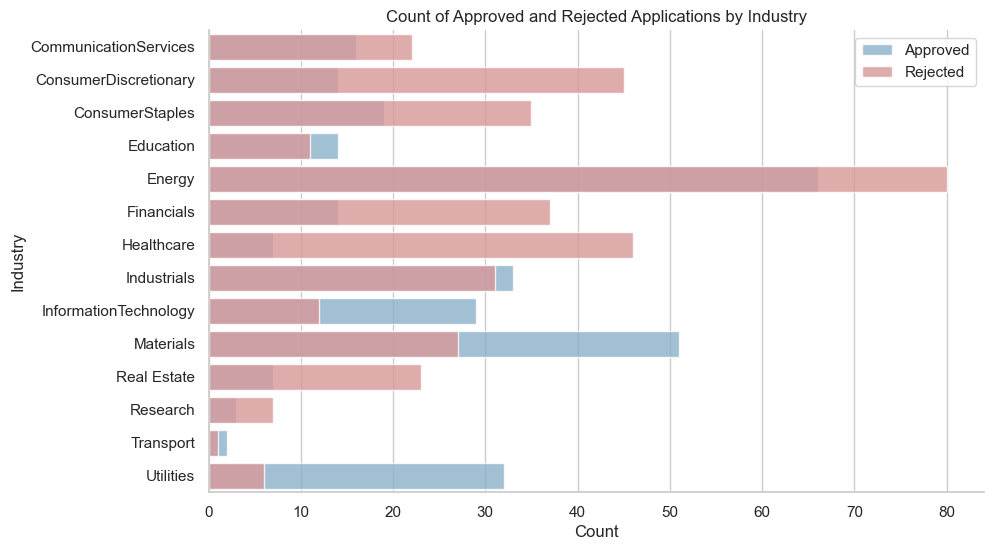

In [64]:
# make it look nicer?
plt.figure(figsize=(10, 6)) 

sns.set_style("whitegrid") 

sns.barplot(x=approved_counts, y=categories, color='#7FB3D5', label='Approved', alpha=0.8)
sns.barplot(x=rejected_counts, y=categories, color='#E18E8E', label='Rejected', alpha=0.8)

plt.xlabel('Count') 
plt.ylabel('Industry') 
plt.title('Count of Approved and Rejected Applications by Industry') 
plt.legend()
sns.despine()
plt.show() 

# Grouped violin plots with split violins

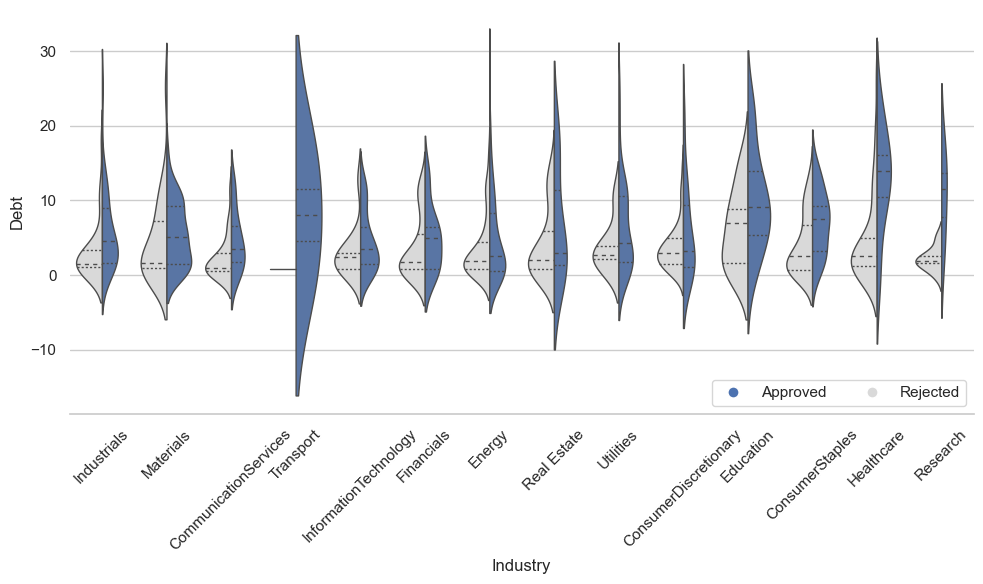

In [82]:
df['Approved'] = pd.to_numeric(df['Approved'])

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="Industry", y="Debt", hue="Approved",
               split=True, inner="quart", linewidth=1,
               palette={1: "b", 0: "0.85"})

sns.despine(left=True)

plt.xlabel("Industry")
plt.ylabel("Debt")
plt.xticks(rotation=45)

approved_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=8)
rejected_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='.85', markersize=8)
plt.legend([approved_patch, rejected_patch], ['Approved', 'Rejected'], loc='lower right', ncol=2)

plt.tight_layout()
plt.show()